# An Empirical Comparison of Supervised and Self-Supervised Learning

In [9]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline: convolutional neural network

In [11]:
conv_args = TrainArgs(batchsize = 10)

In [12]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.299
[epoch: 0, i:   999] avg mini-batch loss: 2.271
[epoch: 0, i:  1499] avg mini-batch loss: 2.136
[epoch: 0, i:  1999] avg mini-batch loss: 2.025
[epoch: 0, i:  2499] avg mini-batch loss: 1.904
[epoch: 0, i:  2999] avg mini-batch loss: 1.827
[epoch: 0, i:  3499] avg mini-batch loss: 1.779
[epoch: 0, i:  3999] avg mini-batch loss: 1.745
[epoch: 0, i:  4499] avg mini-batch loss: 1.672
[epoch: 0, i:  4999] avg mini-batch loss: 1.638
[epoch: 1, i:   499] avg mini-batch loss: 1.596
[epoch: 1, i:   999] avg mini-batch loss: 1.546
[epoch: 1, i:  1499] avg mini-batch loss: 1.553
[epoch: 1, i:  1999] avg mini-batch loss: 1.519
[epoch: 1, i:  2499] avg mini-batch loss: 1.510
[epoch: 1, i:  2999] avg mini-batch loss: 1.489
[epoch: 1, i:  3499] avg mini-batch loss: 1.452
[epoch: 1, i:  3999] avg mini-batch loss: 1.461
[epoch: 1, i:  4499] avg mini-batch loss: 1.423
[epoch: 1, i:  4999] avg mini-batc

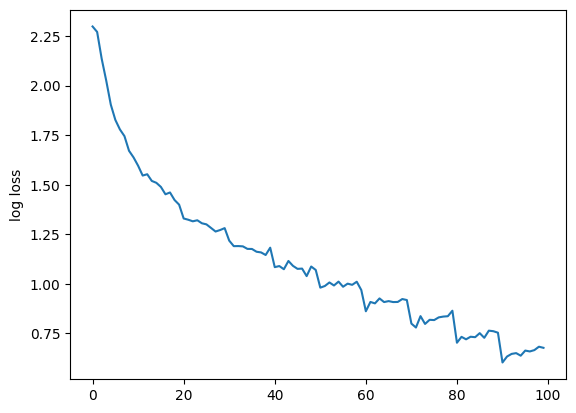

In [13]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [14]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 64.8 %


## Momentum Contrast

### Pre-Training the Encoder

In [15]:
encoder_args = TrainArgs(epochs = 20)

In [16]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.067050
Train Epoch: 2 	Loss: 0.058104
Train Epoch: 3 	Loss: 0.050309
Train Epoch: 4 	Loss: 0.046005
Train Epoch: 5 	Loss: 0.042681
Train Epoch: 6 	Loss: 0.039696
Train Epoch: 7 	Loss: 0.037201
Train Epoch: 8 	Loss: 0.034913
Train Epoch: 9 	Loss: 0.032382
Train Epoch: 10 	Loss: 0.029761
Train Epoch: 11 	Loss: 0.027204
Train Epoch: 12 	Loss: 0.024501
Train Epoch: 13 	Loss: 0.021930
Train Epoch: 14 	Loss: 0.019879
Train Epoch: 15 	Loss: 0.018172
Train Epoch: 16 	Loss: 0.016969
Train Epoch: 17 	Loss: 0.015862
Train Epoch: 18 	Loss: 0.015068
Train Epoch: 19 	Loss: 0.014331
Train Epoch: 20 	Loss: 0.013658


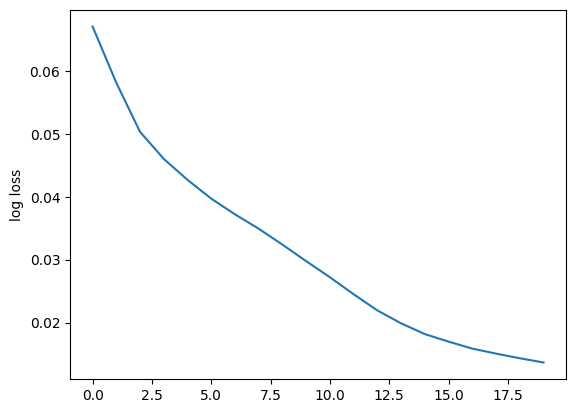

In [17]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [18]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:42<00:00, 97.59it/s]


In [19]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


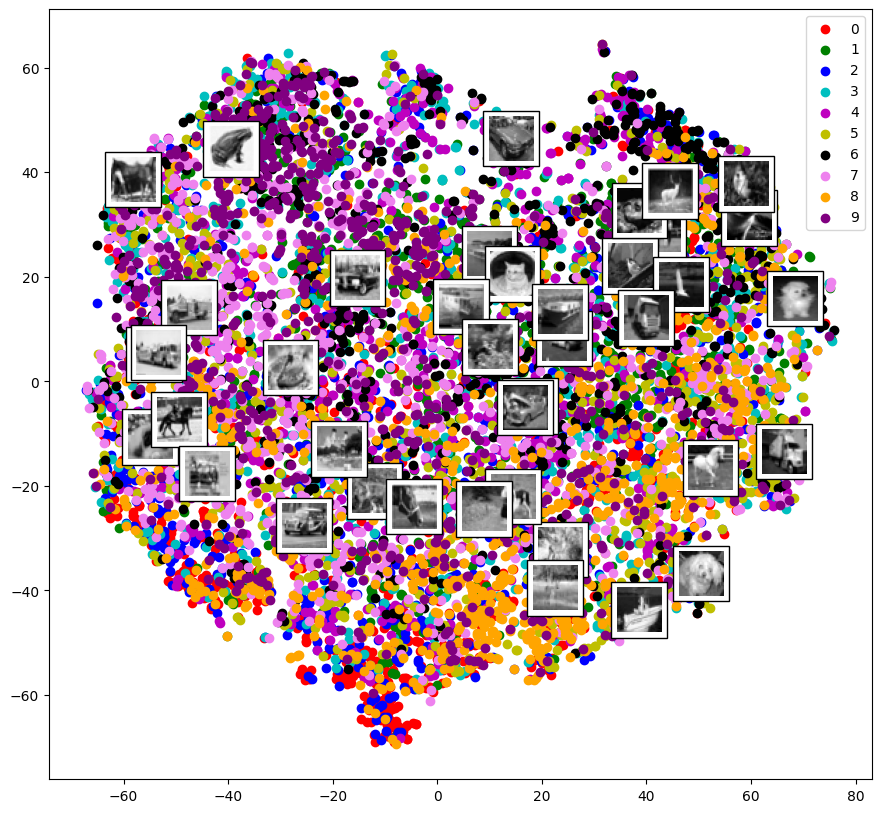

In [20]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [21]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:35<00:00, 97.07it/s] 


Files already downloaded and verified


100%|██████████| 10000/10000 [01:43<00:00, 96.96it/s]


In [22]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [23]:
svm.score(X_test, y_test)

0.4756

### Multiple Runs

In [24]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:51<00:00, 96.72it/s] 


Files already downloaded and verified


100%|██████████| 1000/1000 [00:10<00:00, 97.53it/s]


In [25]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [26]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.292
[epoch: 2, i:   499] avg mini-batch loss: 2.261
[epoch: 3, i:   499] avg mini-batch loss: 2.141
[epoch: 4, i:   499] avg mini-batch loss: 2.024
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.298
[epoch: 2, i:   499] avg mini-batch loss: 2.289
[epoch: 3, i:   499] avg mini-batch loss: 2.253
[epoch: 4, i:   499] avg mini-batch loss: 2.177
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.298
[epoch: 1, i:   499] avg mini-batch loss: 2.270
[epoch: 2, i:   499] avg mini-batch loss: 2.161
[epoch: 3, i:   499] avg mini-batch loss: 2.026
[epoch: 4, i:   499] avg mini-batch loss: 1.951
Files already downloaded and verified


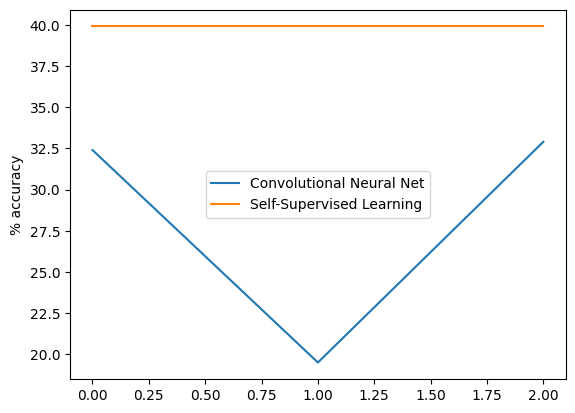

In [27]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [28]:
conv_errors

[32.4, 19.5, 32.9]

In [29]:
svm_errors

[0.399, 0.399, 0.399]

In [30]:
conv_errors

[32.4, 19.5, 32.9]